In [ ]:
import matplotlib
from utils.OddsData import *
from utils.Features import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Read Data

In [ ]:
data_df = read_odds(countries='all')
data_df = remove_nan_vals(data_df)
# data_df = drop_bookies(data_df)
# data_df = drop_date_time(data_df)
data_df["Date"] = pd.to_datetime(data_df["Date"])
data_df = transform_odds_to_probs(data_df)
data_df = drop_duplicates(data_df)
# data_df = data_df.drop(['Country'], axis=1)
# data_df.drop_duplicates(inplace=True)
data_df.describe()

## Add features

In [ ]:
print('Adding Last Close')
data_df = calculate_last_close_feature(data_df)

print('Adding Last FTR')
data_df = calculate_last_ftr_feature(data_df)

print('Adding MMR')
data_df = calculate_mmr_feature(data_df)

print('Adding Points')
data_df = calculate_points_feature(data_df, num_matches=5)
data_df = calculate_points_feature(data_df, num_matches=10)
data_df = calculate_points_feature(data_df, num_matches=15)

print('Adding Realized EV')
data_df = calculate_realized_ev_feature(data_df, num_matches=3)
data_df = calculate_realized_ev_feature(data_df, num_matches=5)
data_df = calculate_realized_ev_feature(data_df, num_matches=9)

print('Adding Shock')
data_df = calculate_shock_feature(data_df, num_matches=1)
data_df = calculate_shock_feature(data_df, num_matches=3)
data_df = calculate_shock_feature(data_df, num_matches=5)

print('Adding Winstreak')
data_df = calculate_win_streak_feature(data_df)

data_df

## Drop Results columns

In [ ]:
data_df_copy = data_df.copy()

In [ ]:
# import math
#
#
# def normalize_date(str_val):
#     if type(str_val) != str and math.isnan(str_val):
#         return None
#     vals = str_val.split("/")
#     assert len(vals) == 3
#     year = vals[-1]
#     if len(year) == 2:
#         if int(year) < 70:
#             year = "20" + year
#         else:
#             year = "19" + year
#     return f"{vals[0]}/{vals[1]}/{year}"
#
#
# #1.3333
# mmr_england_df = pd.read_csv("raw_data/englandm.csv")
# mmr_germany_df = pd.read_csv("raw_data/germanym.csv")
# mmr_sweden_df = pd.read_csv("raw_data/sweden.csv")
# mmr_italy_df = pd.read_csv("raw_data/italym.csv")
# print("Additional data loaded")
# mmr_england_df.Date = mmr_england_df.Date.apply(normalize_date)
# mmr_england_df.Date = pd.to_datetime(mmr_england_df.Date, format="%d/%m/%Y")
# mmr_germany_df.Date = mmr_germany_df.Date.apply(normalize_date)
# mmr_germany_df.Date = pd.to_datetime(mmr_germany_df.Date, format="%d/%m/%Y")
# mmr_italy_df.Date = mmr_italy_df.Date.apply(normalize_date)
# mmr_italy_df.Date = pd.to_datetime(mmr_italy_df.Date, format="%d/%m/%Y")
# mmr_sweden_df.Date = mmr_sweden_df.Date.apply(normalize_date)
# # mmr_sweden_df.Date = pd.to_datetime(mmr_sweden_df.Date, format="%d/%m/%Y")

In [ ]:
# main_teams = set(data_df["H_team"]).union(data_df["A_team"])
# filt = lambda x: [i for i in x if not i.startswith("Unnamed:")]
# england_c = filt(mmr_england_df.columns)
# germany_c = filt(mmr_germany_df.columns)
# sweden_c = filt(mmr_sweden_df.columns)
# italy_c = filt(mmr_italy_df.columns)
# res = np.concatenate([
#     mmr_england_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_germany_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_italy_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_sweden_df[["Home", "Away", "Date", "HG", "AG"]].values,
# ])
# mmr_df = pd.DataFrame(data=res, columns=["Home", "Away", "Date", "FTHG", "FTAG"])
# mmr_teams = set(mmr_df["Home"]).union(set(mmr_df["Away"]))
# mmr_teams = set([x.lower() for x in mmr_teams if type(x) is str])
# england_teams = set(mmr_england_df["HomeTeam"]).union(set(mmr_england_df["AwayTeam"]))
# england_teams = set([x.lower() for x in england_teams if type(x) is str])
# data_teams = set(data_df["H_team"]).union(set(data_df["A_team"]))
# data_teams = set([x.lower() for x in data_teams if type(x) is str])
#
# k = data_df[data_df["Country"] == "england"]
# leagues = ["league-one", "championship", "premier-league", "league-two"]
#
# k = k[k["League"].isin(leagues)]
# k_teams = set(k["H_team"]).union(set(k["A_team"]))
# k_teams = set([x.lower().replace(" ", "") for x in k_teams if type(x) is str])
# k_teams ^ england_teams

In [ ]:
# data_df = data_df.drop(['FTHG', 'FTAG', 'HT1HG', 'HT1AG', 'HT2HG', 'HT2AG'], axis=1)
# data_df

In [ ]:
# data_df.loc[data_df['League'] == 'premier-league'].reset_index(drop=True)
#premier_league_df

In [ ]:
#data_df = data_df.loc[data_df['League'] != 'premier-league'].reset_index(drop=True)
#data_df

## Let's try and drop teams

`Idea`: Maybe MMR is a good proxy for team!  

Let's also drop the country for good measure...

In [ ]:
# data_without_teams_df = data_df.drop(['H_team', 'A_team', 'Country'], axis=1)
data_without_teams_df = data_df

## Let's one-hot encode league

The NN can't handle categorical features and league gives context to the MMR

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder()

# #perform one-hot encoding on 'League' column 
# encoder_df = pd.DataFrame(encoder.fit_transform(data_without_teams_df[['League']]).toarray())
# # encoder_df

# # #merge one-hot encoded columns back with original DataFrame
# data_without_teams_df = data_without_teams_df.join(encoder_df)

# data_without_teams_df = data_without_teams_df.drop(['League'], axis=1)
# data_without_teams_df

In [ ]:
data_without_teams_df

## Split the Data: Train, Val, Test

In [ ]:
columns = ['H_LastFTG', 'A_LastFTG', 'H_elo', 'A_elo', 'H_5Points', 'A_5Points',
           'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points', 'H_3EVs',
           'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
           'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
           'H_winstreak', 'A_winstreak']
all_columns = ['H_team', 'A_team', 'FTHG', 'FTAG', 'H_elo', "A_elo", 'HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle',
               'H_LastOdds',
               'A_LastOdds', 'H_LastFTG', 'A_LastFTG',
               'H_5Points', 'A_5Points', 'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points',
               'H_3EVs', 'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock', 'A_1shock', 'H_3shock',
               'A_3shock', 'H_5shock', 'A_5shock', 'H_winstreak', 'A_winstreak']
drop_later_columns = ['H_team', 'A_team', 'FTHG', 'FTAG']

In [ ]:
data_for_splitting = data_without_teams_df.copy()
data_for_splitting["H_elo"] = -1
data_for_splitting["A_elo"] = -1
# training_df = data_for_splitting
# # training_df = data_for_splitting.loc[data_for_splitting['League'] != 'premier-league']
# # training_df = training_df.drop(['League'], axis=1)
#
# train_size = 0.85
# val_size = 0.15
#
# assert train_size + val_size == 1.0
#
# train_index = int(len(training_df) * train_size)
# df_train = training_df[0:train_index]
# df_valid = training_df[train_index:]
#
# target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']
#
# X, y = training_df[all_columns], training_df[target_columns]
# X_train, y_train = df_train[all_columns].copy(), df_train[target_columns].copy()
# X_valid, y_valid = df_valid[all_columns].copy(), df_valid[target_columns].copy()

In [ ]:
finetuning_df = data_for_splitting  #.loc[data_for_splitting['League'] == 'premier-league']
# finetuning_df = finetuning_df.drop(['League'], axis=1)

train_size = 0.70
val_size = 0.15
test_size = 0.15

assert train_size + val_size + test_size == 1.0

train_index = int(len(finetuning_df) * train_size)
val_index = train_index + int(len(finetuning_df) * val_size)
df_train = finetuning_df[0:train_index]
df_valid = finetuning_df[train_index:val_index]
df_test = finetuning_df[val_index:]

target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']

X_finetuning, y_finetuning = finetuning_df[all_columns].copy(), finetuning_df[target_columns].copy()
X_finetuning_train, y_finetuning_train = df_train[all_columns].copy(), df_train[target_columns].copy()
X_finetuning_valid, y_finetuning_valid = df_valid[all_columns].copy(), df_valid[target_columns].copy()
X_finetuning_test, y_finetuning_test = df_test[all_columns].copy(), df_test[target_columns].copy()

In [ ]:
# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)

In [ ]:
print(X_finetuning_train.shape), print(y_finetuning_train.shape)
print(X_finetuning_valid.shape), print(y_finetuning_valid.shape)
print(X_finetuning_test.shape), print(y_finetuning_test.shape)

# Calculate elo
Get initial elo from training

In [ ]:
from elo_calculator import EloCalculator

teams_all = set(data_df["A_team"]).union(data_df["H_team"])
teams_elo = {k: 1500 for k in teams_all}

elo = EloCalculator()
for row in X_finetuning_train.itertuples():
    elo.update(row.H_team, row.A_team, row.FTHG, row.FTAG, teams_elo)

Add elo to games

In [ ]:
def update_elo(df_update, teams):
    for idx, row in df_update.iterrows():
        df_update.loc[idx, 'H_elo'] = teams[row.H_team]
        df_update.loc[idx, 'A_elo'] = teams[row.A_team]
        elo.update(row.H_team, row.A_team, row.FTHG, row.FTAG, teams)


update_elo(X_finetuning_train, teams_elo)
update_elo(X_finetuning_valid, teams_elo)
update_elo(X_finetuning_test, teams_elo)

In [ ]:
X_finetuning_train.drop(drop_later_columns, axis=1, inplace=True)
X_finetuning_valid.drop(drop_later_columns, axis=1, inplace=True)
X_finetuning_test.drop(drop_later_columns, axis=1, inplace=True)

In [ ]:
X_finetuning_test

## Plotting distribution of the newly created features

Let's plot some values to see their distribution...

In [ ]:
print(X.columns)

In [ ]:
X[['H_MMR', 'A_MMR']].hist(bins=50)
plt.show()

In [ ]:
X[['H_LastOdds', 'A_LastOdds']].hist(bins=50)
plt.show()

In [ ]:
X[['H_LastFTG', 'A_LastFTG']].hist(bins=50)
plt.show()

In [ ]:
X[['H_5Points', 'A_5Points', 'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points']].hist(bins=50)
plt.show()

In [ ]:
X[['H_3EVs', 'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs']].hist(bins=50)
plt.show()

In [ ]:
X[['H_1shock', 'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock']].hist(bins=50)
plt.show()

In [ ]:
X[['H_winstreak', 'A_winstreak']].hist(bins=50)
plt.show()

## Scaling

We need to scale all these features, time to deploy MinMaxScaler!

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

finetuning_scaler = MaxAbsScaler()

print(finetuning_scaler.fit(X_finetuning_train[columns]))
X_finetuning_train_scale = X_finetuning_train.copy()
X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])

X_finetuning_val_scale = X_finetuning_valid.copy()
X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])

X_finetuning_test_scale = X_finetuning_test.copy()
X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])

X_finetuning_train_scale

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
#
# training_scaler = MinMaxScaler()
#
# print(training_scaler.fit(X_train[columns]))
# X_train_scale = X_train.copy()
# X_train_scale[columns] = training_scaler.transform(X_train[columns])
#
# X_val_scale = X_valid.copy()
# X_val_scale[columns] = training_scaler.transform(X_valid[columns])
#
# finetuning_scaler = MinMaxScaler()
#
# print(finetuning_scaler.fit(X_finetuning_train[columns]))
# X_finetuning_train_scale = X_finetuning_train.copy()
# X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])
#
# X_finetuning_val_scale = X_finetuning_valid.copy()
# X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])
#
# X_finetuning_test_scale = X_finetuning_test.copy()
# X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])
#
# X_finetuning_train_scale

In [ ]:
# from sklearn.preprocessing import MaxAbsScaler
#
# training_scaler = MaxAbsScaler()
#
# print(training_scaler.fit(X_train[columns]))
# X_train_scale = X_train.copy()
# X_train_scale[columns] = training_scaler.transform(X_train[columns])
#
# X_val_scale = X_valid.copy()
# X_val_scale[columns] = training_scaler.transform(X_valid[columns])
#
# finetuning_scaler = MaxAbsScaler()
#
# print(finetuning_scaler.fit(X_finetuning_train[columns]))
# X_finetuning_train_scale = X_finetuning_train.copy()
# X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])
#
# X_finetuning_val_scale = X_finetuning_valid.copy()
# X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])
#
# X_finetuning_test_scale = X_finetuning_test.copy()
# X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])
#
# X_finetuning_train_scale

In [ ]:
# X_train_scale

## Modelling

**Input layer**: The number of neurons in the input layer is calculated as follows:  
```Number of features in the training set + 1```  

In this case, as there were 29 features in the training set to begin with, 30 input neurons are defined accordingly.  

**Hidden layer**: One hidden layer is defined, as a single layer is suitable when working with most datasets. The number of neurons in the hidden layer is determined as follows:  
```Training Data Samples/Factor * (Input Neurons + Output Neurons)```  

A factor of 1 is set in this case, the purpose of the factor being to prevent overfitting. A factor can take a value between 1 and 10. With 30 neurons in the input layer, 3 neuron in the output layer and 38,250 observations in the training set, the hidden layer is assigned 1200 neurons.  

**Output layer**: As this is the result layer, the output layer takes a value of 3.


In [150]:
import tensorflow

tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(29 + 1, input_dim=29, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1200, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 30)                900       
_________________________________________________________________
dense_49 (Dense)             (None, 800)               24800     
_________________________________________________________________
module_wrapper_27 (ModuleWra (None, 800)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 800)               640800    
_________________________________________________________________
module_wrapper_28 (ModuleWra (None, 800)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 800)               640800    
_________________________________________________________________
module_wrapper_29 (ModuleWra (None, 800)             

In [151]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
history = model.fit(X_finetuning_train_scale, y_finetuning_train, epochs=50, batch_size=400, verbose=1,
                    validation_data=(X_finetuning_val_scale, y_finetuning_valid))

Epoch 1/50
86/86 [==============================] - 5s 35ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0626 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0348
Epoch 2/50
86/86 [==============================] - 2s 28ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0342 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0333
Epoch 3/50
86/86 [==============================] - 2s 26ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0313 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0328
Epoch 4/50
86/86 [==============================] - 2s 26ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0298 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0326
Epoch 5/50
86/86 [==============================] - 2s 25ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0290 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0322
Epoch 6/50
86/86 [==============================] - 2s 28ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0283 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0320
Epoch 7/50
86/86 [====

In [ ]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
# history = model.fit(X_train_scale, y_train, epochs=50, batch_size=400, verbose=1,
#                     validation_data=(X_val_scale, y_valid))
# predictions = model.predict(X_val_scale)

In [ ]:
# print(history.history.keys())
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
#
# from sklearn.metrics import mean_squared_error
#
# print('MSE between Preds  & True: ', mean_squared_error(predictions, y_valid))
# print('MSE between Open  & Close: ',
#       mean_squared_error(X_valid[['HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle']], y_valid))

In [ ]:
# history = model.fit(X_finetuning_train_scale, y_finetuning_train, epochs=50, batch_size=200, verbose=1,
#                     validation_data=(X_finetuning_val_scale, y_finetuning_valid))

In [152]:
predictions = model.predict(X_finetuning_test_scale)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


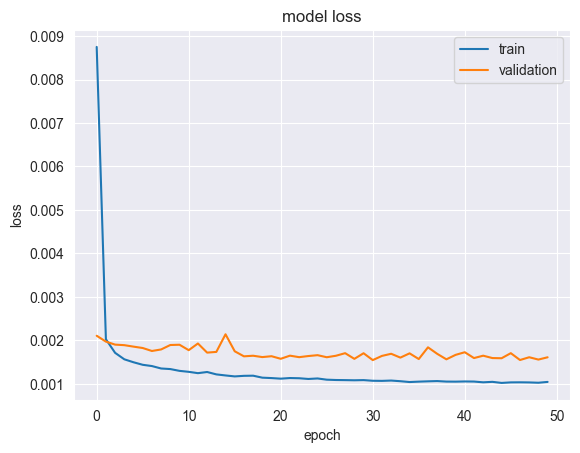

MSE between Preds  & True:  0.0018053271231331873
MSE between Open  & Close:  0.0020582171707751533


In [153]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

from sklearn.metrics import mean_squared_error

print('MSE between Preds  & True: ', mean_squared_error(predictions, y_finetuning_test))
print('MSE between Open  & Close: ',
      mean_squared_error(X_finetuning_test_scale[['HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle']], y_finetuning_test))

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


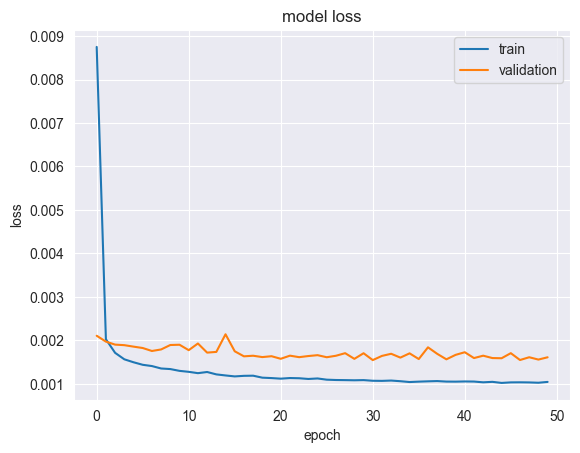

In [154]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Backtesting

In [162]:

from collections import namedtuple


class Games:
    def __init__(self, home, draw, away):
        self.home = home
        self.draw = draw
        self.away = away

    def get_normalized(self):
        total = self.home + self.draw + self.away
        return Games(self.home / total, self.draw / total, self.away / total)

    def get_odds(self):
        return Games(1 / self.home, 1 / self.draw, 1 / self.away)


def buy_function(diff_h, diff_d, diff_a, margin=0):
    max = np.argmax([diff_h, diff_d, diff_a])
    res = [False, False, False]
    if [diff_h, diff_d, diff_a][max] > margin:
        res[max] = True
    return res


def generate_buy_signals(given_percentage, predicted_percentage, margin=0):
    diff_h = predicted_percentage.home - given_percentage.home
    diff_d = predicted_percentage.draw - given_percentage.draw
    diff_a = predicted_percentage.away - given_percentage.away
    buy = [buy_function(*v, margin) for v in zip(diff_h, diff_d, diff_a)]
    return Games(*[np.array(k) for k in zip(*buy)])


def evaluate_buy_signals(home_goals, away_goals, odds, buy_sig):
    h_outcome = home_goals > away_goals
    d_outcome = home_goals == away_goals
    a_outcome = home_goals < away_goals

    h_win = ((h_outcome & buy_sig.home) * odds.home).sum()
    h_spent = buy_sig.home.sum()
    d_win = ((d_outcome & buy_sig.draw) * odds.draw).sum()
    d_spent = buy_sig.draw.sum()
    a_win = ((a_outcome & buy_sig.away) * odds.away).sum()
    a_spent = buy_sig.away.sum()

    total_spent = h_spent + d_spent + a_spent
    winning_bets = ((h_outcome & buy_sig.home).sum()
                    + (d_outcome & buy_sig.draw).sum()
                    + (a_outcome & buy_sig.away).sum())

    metrics = {
        "roi": (h_win + d_win + a_win - total_spent),
        "bet_count": total_spent,
        "bet_winning": winning_bets,
        "bet_loosing": total_spent - winning_bets,
        "win_percentage": winning_bets / total_spent
    }

    return metrics

open_percentage = Games(df_test["HO_Pinnacle"].array,
                        df_test["DO_Pinnacle"].array,
                        df_test["AO_Pinnacle"].array)

predictions = model.predict(X_finetuning_test_scale)
predicted_odds = Games(*predictions.T)
buy_sig = generate_buy_signals(open_percentage, predicted_odds, 0.05)
evaluate_buy_signals(df_test["FTHG"].array, df_test["FTAG"].array, open_percentage.get_odds(), buy_sig)

{'roi': 37.83000000000001,
 'bet_count': 147,
 'bet_winning': 72,
 'bet_loosing': 75,
 'win_percentage': 0.4897959183673469}

In [160]:
min(df_test["Date"]), max(df_test["Date"])

(Timestamp('2021-03-21 00:00:00'), Timestamp('2022-11-22 00:00:00'))

# Proof of concept
lets say we always predict the close correctly (we use the actual close)

In [157]:
open_percentage = Games(data_df["HO_Pinnacle"].array,
                        data_df["DO_Pinnacle"].array,
                        data_df["AO_Pinnacle"].array)

close_percentage = Games(data_df["HC_Pinnacle"].array,
                         data_df["DC_Pinnacle"].array,
                         data_df["AC_Pinnacle"].array)
buy_sig = generate_buy_signals(open_percentage, close_percentage)

evaluate_buy_signals(data_df["FTHG"].array, data_df["FTAG"].array, open_percentage.get_odds(), buy_sig)

{'roi': 3210.719999999994,
 'bet_count': 47593,
 'bet_winning': 18832,
 'bet_loosing': 28761,
 'win_percentage': 0.3956884415775429}

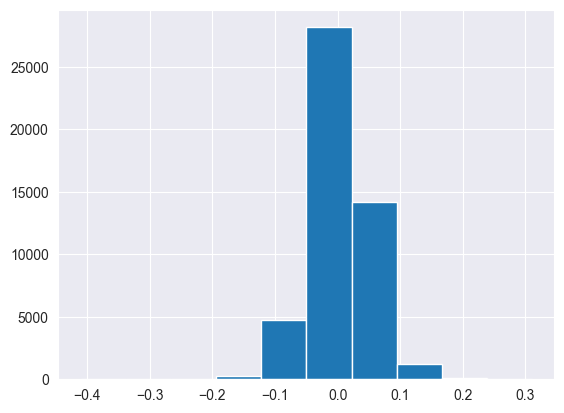

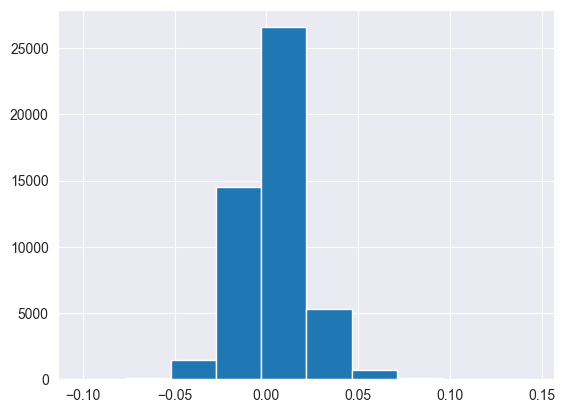

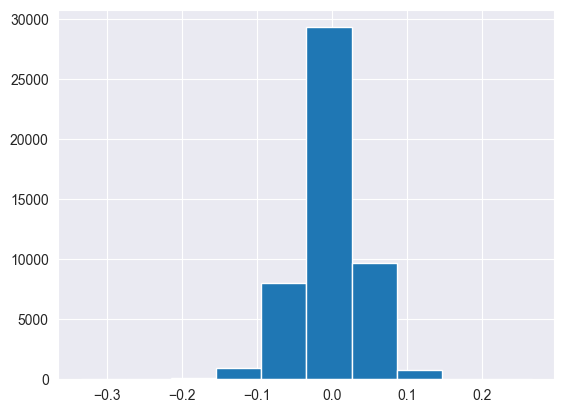

In [158]:
(data_df["HO_Pinnacle"] - data_df["HC_Pinnacle"]).hist()
plt.show()
(data_df["DO_Pinnacle"] - data_df["DC_Pinnacle"]).hist()
plt.show()
(data_df["AO_Pinnacle"] - data_df["AC_Pinnacle"]).hist()
plt.show()

## Betting heatmap

In [ ]:
data_df = data_df_copy.copy()
# data_df = data_df[data_df["Date"] > pd.Timestamp(year=2019, month=1, day=1)]
data_df = data_df[pd.Timestamp(year=2021, month=1, day=1) < data_df["Date"]]
len(data_df)

........

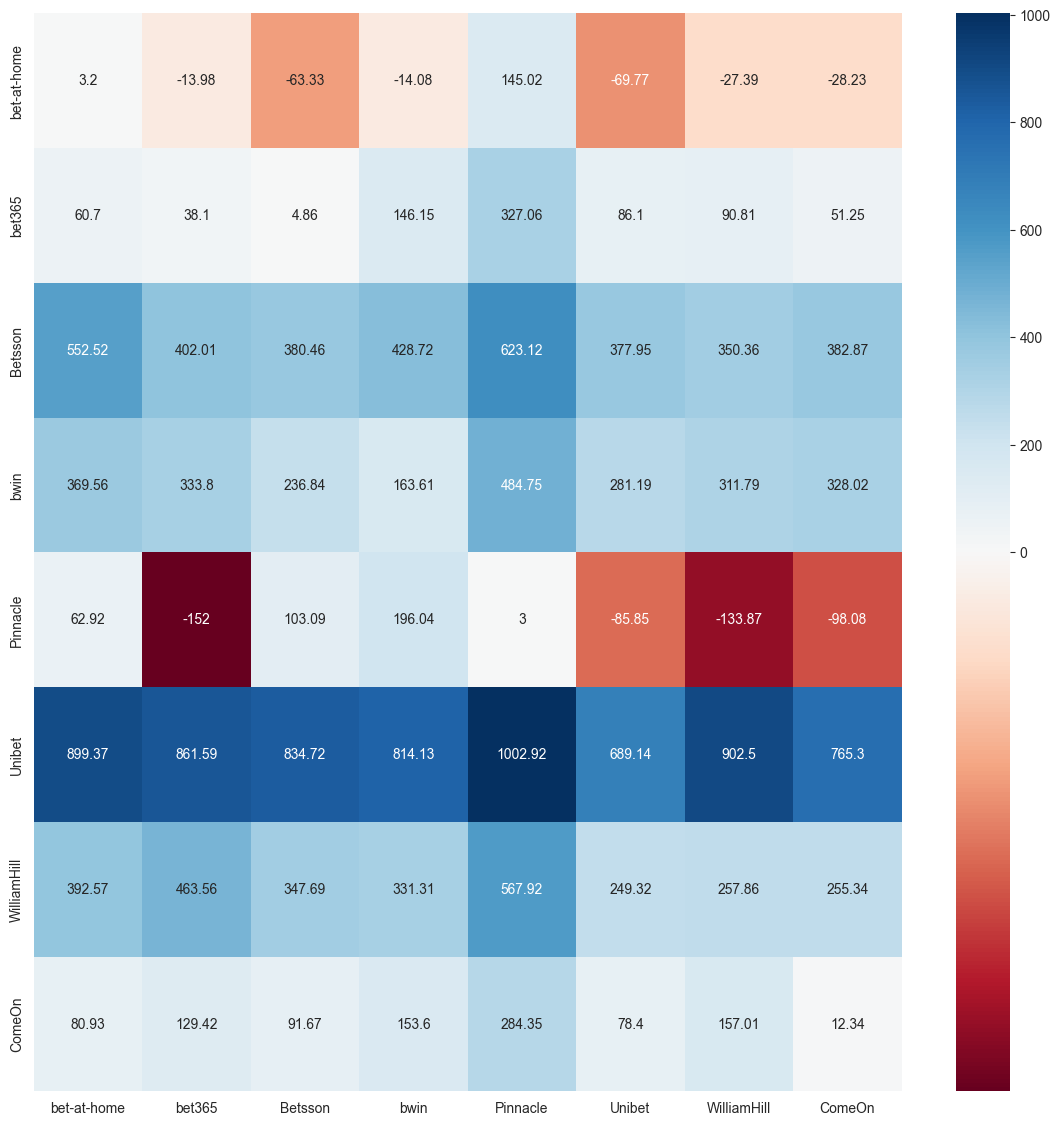

In [161]:


bet_names = ["bet-at-home", "bet365", "Betsson", "bwin", "Pinnacle", "Unibet", "WilliamHill", "ComeOn"]
prefix = "O"

bet_odds = [Games(
    data_df[f"H{prefix}_{name}"],
    data_df[f"D{prefix}_{name}"],
    data_df[f"A{prefix}_{name}"]) for name in bet_names]


def betting_heatmap(home_goals, away_goals, bet_odds, margin=0):
    res = np.zeros((len(bet_names), len(bet_names)))
    for i, betting_site in enumerate(bet_odds):
        for q, truth in enumerate(bet_odds):
            buy_sig = generate_buy_signals(betting_site, truth.get_normalized(), margin)
            res[i][q] = round(evaluate_buy_signals(home_goals, away_goals, betting_site.get_odds(), buy_sig)['roi'], 2)
        print(".", end="")

    plt.figure(figsize=(14, 14))

    vcenter = 0
    vmin, vmax = np.amin(res), np.amax(res)

    normalize = matplotlib.colors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = matplotlib.cm.RdBu

    ax = sns.heatmap(res, annot=True, xticklabels=bet_names, yticklabels=bet_names, fmt='g', cmap=colormap,
                     norm=normalize)


betting_heatmap(data_df["FTHG"].array, data_df["FTAG"].array, bet_odds, 0.03)

In [ ]:
b365 = Games(
    data_df[f"H{prefix}_bet365"],
    data_df[f"D{prefix}_bet365"],
    data_df[f"A{prefix}_bet365"])
pinnacle = Games(
    data_df[f"H{prefix}_Pinnacle"],
    data_df[f"D{prefix}_Pinnacle"],
    data_df[f"A{prefix}_Pinnacle"])
signals = generate_buy_signals(b365, pinnacle.get_normalized())
evaluate_buy_signals(data_df["FTHG"].array, data_df["FTAG"].array, b365.get_odds(), signals)